In [195]:
import numpy as np
import altair as alt
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
from tqdm import tqdm

In [196]:
# Computes a CI based on data (assumed to be normally distributed)
def mean_confidence_interval(data, confidence=0.5):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [197]:
# Create rv ~ N(5,1)
rv = norm(loc=5, scale=1)

In [198]:
l = []
for x in tqdm(range(100)):
    
    size = 20

    vals = rv.rvs(size=size)
    df = pd.DataFrame()
    df['vals'] = vals

    median = df['vals'].median()
    sample_mean = df['vals'].mean()
    std = df['vals'].std()
   
    #r = stats.bayes_mvs(df['vals'].values, alpha=0.5)[0].minmax
    r = mean_confidence_interval(df['vals'].values, confidence=0.5)[1:]
    if (5 > r[0]) and (5<r[1]):
        l.append([sample_mean, r[0], r[1], True])
    else:
        l.append([sample_mean, r[0], r[1], False])
    

100%|██████████| 100/100 [00:00<00:00, 452.25it/s]


In [199]:
df = pd.DataFrame(l, columns = ['mu', 'c0', 'c1', 'in'])
df['point'] = df.index
df['rule'] = 5
df.head()

,mu,c0,c1,in,point,rule
0,4.920718,4.762187,5.079248,True,0,5
1,5.418789,5.285417,5.552161,False,1,5
2,4.683628,4.511100,4.856156,False,2,5
3,5.352557,5.192379,5.512734,False,3,5
4,5.075681,4.913246,5.238115,True,4,5


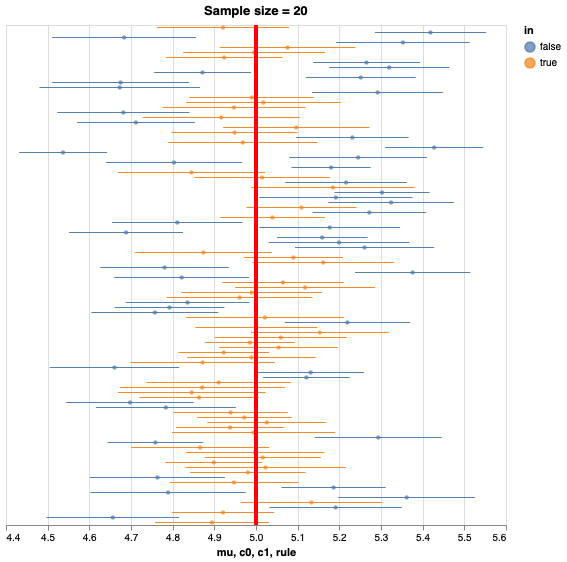

In [200]:
points = alt.Chart(df).mark_circle(size=20).encode(
    alt.X("mu:Q", scale=alt.Scale(domain=[4.9, 5.1])),
    alt.Y('point:O', axis=None),
    alt.Color('in'))

error_bars = points.mark_rule(size=0.5).encode(
    x='c0',
    x2='c1',
)

rule = alt.Chart(df).mark_rule(color='red', size=3).encode(
    x='rule'
)

(points + error_bars + rule).properties(height=500, width=500, title=f'Sample size = {size}')

In [201]:
df['in'].value_counts(normalize=True)

True     0.51
False    0.49
Name: in, dtype: float64

In [202]:
(df['c1']-df['c0']).sort_values()

28    0.189169
70    0.207460
25    0.210556
63    0.215672
42    0.216653
        ...   
88    0.384162
12    0.384519
81    0.390832
32    0.391096
72    0.395027
Length: 100, dtype: float64